In [1]:
import math
import numpy as np

# task 1
# function implementation

# counter vars
fcount = 0
g1count = 0
g2count = 0
g3count = 0
g4count = 0

# counter reset
def reset():
    global fcount; fcount = 0
    global g1count; g1count = 0
    global g2count; g2count = 0
    global g3count; g3count = 0
    global g4count; g4count = 0

# objective function
def f(x):
    z1 = 0.0625 * x[0] 
    z2 = 0.0625 * x[1]
    
    global fcount
    fcount += 1
    
    return((1.7781 * z2 * (x[2]**2)) + (0.6224 * z1 * x[2] * x[3]) + (3.1661 * (z1**2) * x[3]) + (19.84 * (z1**2) * x[2]))

# constraints
def g1(x):
    global g1count
    g1count += 1
    
    return(0.00954 * x[2])

def g2(x):
    global g2count
    g2count += 1
    return(0.0193 * x[2])

def g3(x):
    global g3count
    g3count += 1
    return(x[3])

def g4(x):
    global g4count
    g4count += 1
    return((-1 * math.pi * (x[2]**2) * x[3]) - ((4/3) * math.pi * (x[2]**3)))

def applyConstraints(x):
    z1 = 0.0625 * x[0] 
    z2 = 0.0625 * x[1]
    
    if (g1(x) > z2):
        return (1)
    elif (g2(x) > z1):
        return (2)
    elif (g3(x) > 240):
        return (3)
    elif (g4(x) > -1296000):
        return (4)
    else:
        return (0)

In [2]:
# test for function implementations
import numpy as np
x = np.array([1, 35, 11.678, 88.76])
print("Objective function output: ", f(x))
print("Constraint function 1 output: ", g1(x))
print("Constraint function 2 output: ", g2(x))
print("Constraint function 3 output: ", g3(x))
print("Constraint function 4 output: ", g4(x))

Objective function output:  572.77017736475
Constraint function 1 output:  0.11140812000000001
Constraint function 2 output:  0.22538540000000004
Constraint function 3 output:  88.76
Constraint function 4 output:  -44699.10187026799


In [3]:
import numpy as np

# task 2
# random search implementation

# this function generates an array for x that complies with constraints
def randomElement():
    x = np.array([0, 0, 0.0, 0.0])
    
    x[0] = np.random.randint(1, 99)
    x[1] = np.random.randint(1, 99)
    x[2] = np.random.uniform(10, 200)
    x[3] = np.random.uniform(10, 200)
    
    constraint = applyConstraints(x)
    
    while (constraint != 0):
        constraint = applyConstraints(x)
        #print("a")
        if (constraint == 1):
            x[1] = np.random.randint(1, 99)
            x[2] = np.random.uniform(10, 200)
        if (constraint == 2):
            x[0] = np.random.randint(1, 99)
            x[2] = np.random.uniform(10, 200)
        if (constraint == 3):
            x[3] = np.random.uniform(10, 200)
        if (constraint == 4):
            x[2] = np.random.uniform(10, 200)
            x[3] = np.random.uniform(10, 200)
    
    return (x)

# performs a random search
# max_iter (int) number of iterations (evaluations of any function f(x) or g(x))
def randomSearch(max_iter):
    global fcount; global g1count; global g2count; global g3count; global g4count
    fbest = 10000000
    best = np.array([0, 0, 0.0, 0.0])
    
    #resets function counters
    reset()
    
    while (fcount < max_iter and g1count < max_iter and
           g2count < max_iter and g3count < max_iter and 
           g4count < max_iter):
           
            result = randomElement()
            
            if (f(result) < fbest):
                fbest = f(result)
                best = result
                
    #print(fbest)
    #print(best)
    #print(fcount, "|", g1count, "|", g2count, "|", g3count, "|", g4count)
    reset()
    return(fbest)
    

In [4]:
# test
randomSearch(4000)

14777.957639301927

In [5]:
import math as m
import numpy as np

# task 3
# simulated annealing

# calculates acceptance probability
def acceptance(x, xbest, k):
    dy = f(x) - f(xbest)
    ti = 5000
    tk = ti/k
    
    if (dy <= 0):
        return(1)
    else:
        output = min(m.exp(-dy/tk), 1)
        return(output)

# generates new x values
# based on gaussian distribution
# xc is a numpy array of current best x values

def newElement(xc):
    x = np.array([0, 0, 0.0, 0.0])
    
    x[0] = np.random.normal(xc[0], 1)
    x[1] = np.random.normal(xc[1], 1)
    x[2] = np.random.normal(xc[2], 2)
    x[3] = np.random.normal(xc[3], 2)
    
    constraint = applyConstraints(x)
    
    while (constraint != 0):
        constraint = applyConstraints(x)
        #print("a")
        if (constraint == 1):
            x[1] = np.random.normal(xc[1], 1)
            x[2] = np.random.normal(xc[2], 2)
        if (constraint == 2):
            x[0] = np.random.normal(xc[0], 1)
            x[2] = np.random.normal(xc[2], 2)
        if (constraint == 3):
            x[3] = np.random.normal(xc[3], 2)
        if (constraint == 4):
            x[2] = np.random.normal(xc[2], 2)
            x[3] = np.random.normal(xc[3], 2)
    
    x[0] = m.trunc(x[0])
    x[1] = m.trunc(x[1])
    return (x)

# performs simulated annealing
def simAnnealing(max_iter):
    xbest = randomElement()
    ybest = f(xbest)
    xcurrent = xbest
    k = 1
    
    reset()
    
    while (fcount < max_iter and g1count < max_iter and
           g2count < max_iter and g3count < max_iter and 
           g4count < max_iter):
        xprime = newElement(xcurrent)
        yprime = f(xprime)
        
        if (np.random.uniform() <= acceptance(xprime, xbest, k)):
            xcurrent = xprime
        if (yprime < ybest):
            xbest = xprime
            ybest = yprime
    # print(xbest)
    return(ybest)

In [9]:
#test
xprev = np.array([16, 11, 45.55412294, 177.63441058]) # 9039.438838998805
x = np.array([16, 19, 47.24637389, 138.21540878]) # 10152.672207918571
xc = np.array([16, 19, 47.24637389, 138.21540878]) # 10152.672207918571
#acceptance(x, xprev, 1)
#newElement(xc)

simAnnealing(4000)

5927.2096177066815

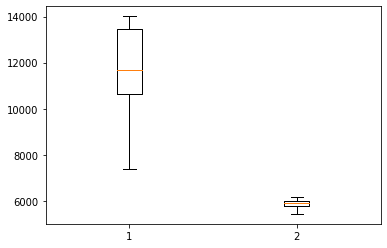

[[10752.28286776353, 13445.573605822787, 12152.435609427723, 9678.336559520418, 13594.198566680052, 14012.717423706481, 10393.60236119033, 7378.366220528364, 10654.327252449433, 13675.558191768863, 10953.40454543272, 13975.807328036077, 10633.99396577862, 13204.509388233988, 11806.182130332618, 13277.436626371438, 13699.104391924964, 11254.340727262259, 11682.19011887976, 11647.212994601014, 9737.050974680167], [5933.409924274655, 6102.195759649899, 5804.9922840214895, 6189.220286734426, 5550.151363645044, 5941.595777360495, 5437.731993178914, 6014.420384836773, 5616.237289276238, 5933.002506966714, 5768.294042931344, 5917.18227257207, 6030.272041923727, 6093.9751082102075, 6138.7592144884175, 5886.030843769986, 6009.964241727382, 5547.070122098328, 5761.4070618012865, 5931.64422072857, 5634.928744321806]]


In [13]:
import matplotlib.pyplot as plt

# task 4

#
# as can be seen from my results (each tuple representing one of the 21 runs of the program, where the first number is the random search result
# and the second number is the simulated annealing result), simulated annealing consistently provides better results than the random search,
# with values of f(x) far closer to the best known solution provided of 5.8853327736*10^3.
#

random = []
stochastic = []
out = []

for counter in range (21):
    random.append(randomSearch(4000))
    stochastic.append(simAnnealing(4000))

out.append(random)
out.append(stochastic)
    
plt.boxplot(out)
plt.show()

print(out)